In [2]:
#Data Understanding and Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ngram_df = pd.read_csv('Preprocessed.csv')

/var/folders/9p/7sb9_6rs4k14xg5ncv4qnqhm0000gn/T/ipykernel_4359/2537213780.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### TTR Analysis


In [2]:
import nltk
from nltk.tokenize import word_tokenize

# Make sure to download the necessary NLTK resource
nltk.download('punkt')

def calculate_ttr(text):
    if pd.isna(text):  # Check if the text is NaN
        return 0  # Return 0 or some predefined TTR value for NaN entries
    
    # Convert text to string in case it's not
    text = str(text).lower()

    # Tokenize the text
    tokens = word_tokenize(text)
    # Calculate number of unique words (types)
    types = len(set(tokens))
    # Calculate total number of words (tokens)
    tokens_count = len(tokens)
    # Calculate Type-Token Ratio (TTR)
    return types / tokens_count if tokens_count > 0 else 0  # Ensure no division by zero

# Load your DataFrame
ttr_df = pd.read_csv('Preprocessed_subset.csv')


# Apply the TTR calculation to the 'cleaned_text' column
ttr_df['TTR'] = ttr_df['cleaned_text'].apply(calculate_ttr)

# Print the first few rows of the DataFrame to see the TTR values
print(ttr_df[['cleaned_text', 'TTR']].head())

# Optionally, save the DataFrame with the TTR column to a new CSV file
ttr_df.to_csv('Updated_with_TTR.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreasmaskine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        cleaned_text       TTR
0  cair continues nudge nudge nudge american peop...  0.607547
1  washington reuters four conservative u republi...  0.816901
2  maybe republican frontrunner donald trump stra...  0.747619
3  washington reuters backlash bump stock gun acc...  0.681564
4  white student become throw away citizen campus...  0.665644


In [6]:
max_ttr_index = ttr_df['TTR'].idxmin()

# Print the row with the highest TTR
print("Row with the highest TTR:")
print(ttr_df.loc[max_ttr_index])

Row with the highest TTR:
label                                                              1
cleaned_text                                                     NaN
cleaned_subject                                             leftnews
cleaned_title      phony hillary pull woman card jayzbeyonce gig ...
TTR                                                              0.0
Name: 35, dtype: object


it was identified, from the result above that there were rows with NaN, so the code below will remove the NaN.

In [8]:
ttr_df.dropna(inplace=True)

ttr_df.to_csv('Updated_with_TTR.csv', index=False)



the result above print all columns with nan.

In [9]:
nan_counts = ttr_df.isna().sum()
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
label              0
cleaned_text       0
cleaned_subject    0
cleaned_title      0
TTR                0
dtype: int64


Lets try to visualize the results 

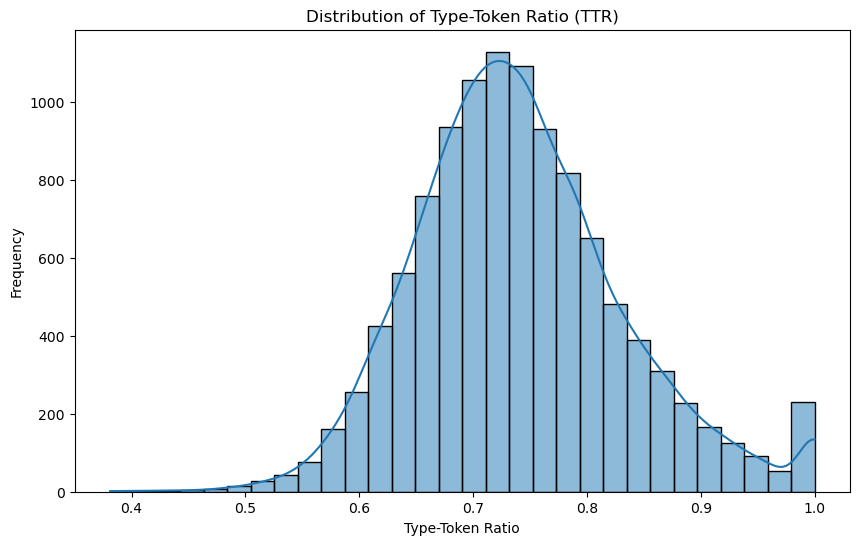

In [10]:
#histogram
import matplotlib.pyplot as plt
import seaborn as sns


# Plot a histogram of the TTR values
plt.figure(figsize=(10, 6))
sns.histplot(ttr_df['TTR'], kde=True, bins=30)  # kde adds a density plot
plt.title('Distribution of Type-Token Ratio (TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.show()

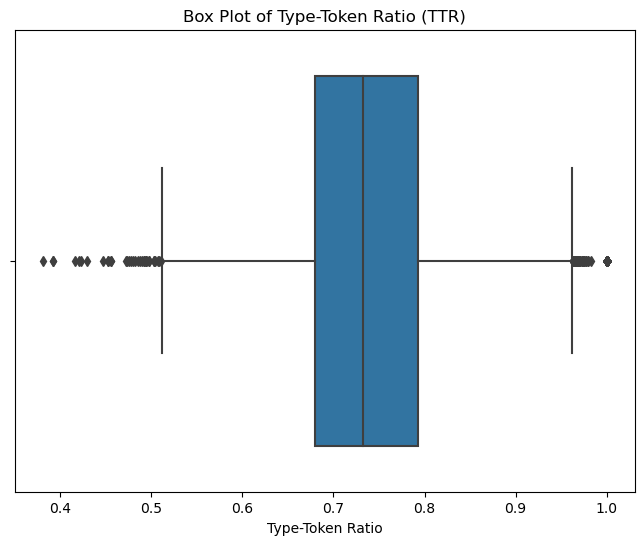

In [11]:
# Box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x=ttr_df['TTR'])
plt.title('Box Plot of Type-Token Ratio (TTR)')
plt.xlabel('Type-Token Ratio')
plt.show()

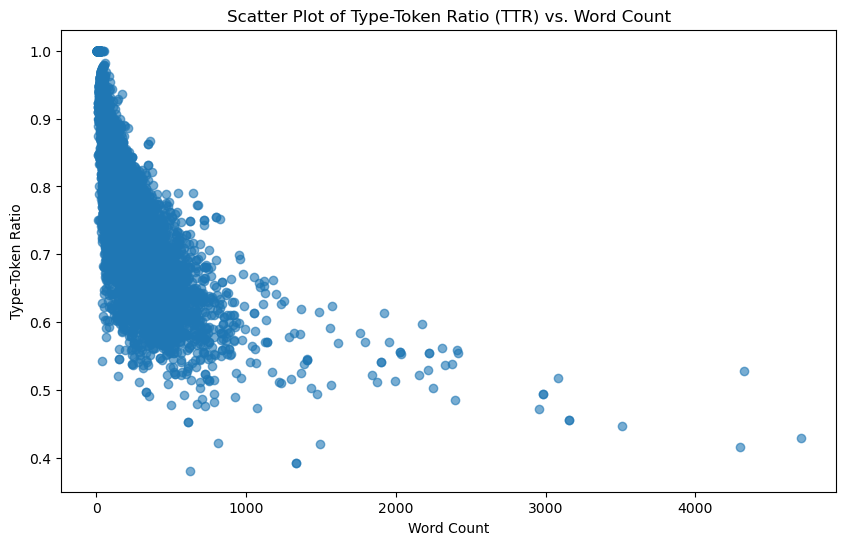

In [12]:
#Scatter Plot

# Example: Plot TTR against another variable 'WordCount'
ttr_df['WordCount'] = ttr_df['cleaned_text'].apply(lambda x: len(x.split()))  # Assuming 'cleaned_text' exists

plt.figure(figsize=(10, 6))
plt.scatter(ttr_df['WordCount'], ttr_df['TTR'], alpha=0.6)
plt.title('Scatter Plot of Type-Token Ratio (TTR) vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Type-Token Ratio')
plt.show()